# Analyse Hilbertienne et Fourier: FFT 2D

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Exercice 1 - Visualiser une FFT à deux dimensions.

Une image de $N \times M$ pixels encodée avec 256 niveaux de gris peut être interprétée comme une matrice à $N$ lignes et $M$ colonnes dont les composantes prennent des valeurs dans $[0,255] \subset \mathbb{N}$.

1) En utilisant la librairie numpy de Python, générer une matrice carrée $Z \in \mathcal{M}_{N, N}(\mathbb{R})$ dont les composantes vérifient la relation
$$
Z_{n, m}=\cos \left(\frac{2 \pi}{N} f X_{n, m}\right)
$$
où $X_{n, m}=m$. On prendra pour commencer $N=32$ et $f=1$.

In [ ]:
N = 32
M = 32

f = 1

Xn = np.arange(N)
X = np.empty((N, M))

for j in range(M):
    X[j, :] = Xn


In [ ]:
Z = np.cos((2*np.pi*f/N)*X)

2) Éxecuter la commande `plt.imshow(Z)`.

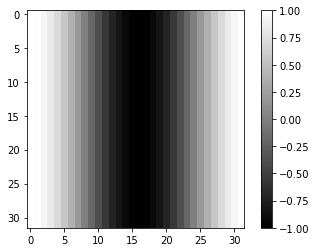

In [79]:
plt.imshow(Z, cmap='gray')
plt.colorbar()

In [80]:
Z2 = 255*((Z+1)/2)

3) Calculer la FFT de $Z$. Utiliser pour cela la fonction `fft2` de `numpy.fft`. 

In [81]:
Zfft = np.fft.fftshift(np.fft.fft2(Z))

4) Représenter le module de cette FFT à l'aide de la fonction fournie display_image. On pourra utiliser le paramètre vmax $=10000$ de manière à augmenter la luminosité des valeurs situées en-dessous. à la place, on pourra aussi afficher $\log _{10}(1+|\hat{Z}|)$ afin « d'aplatir » l'intervalle des valeurs affichées. On pourra également observer l'effet de la fonction fftshift sur les données à visualiser.

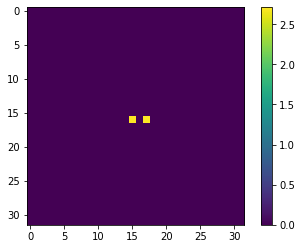

In [82]:
plt.imshow(np.log10(1+np.real(Zfft)))
plt.colorbar()

# Pas de variation selon l'axe Oy
# 2 fréquence sinusoïdal selon l'axe Ox

5) La fonction `imshow` affiche une image (ici de taille $512 \times 512$ ). Les axes des abscisses et des ordonnées proposent par défaut des valeurs minimales et maximales liées à la taille de l'image. Ceci n'est pas correct lors de l'utilisation de la FFT. On lui préférera par la suite la fonction aff_img qui permet de changer les valeurs par défaut sur les axes. Une exemple d'utilisation est fourni ci-dessous


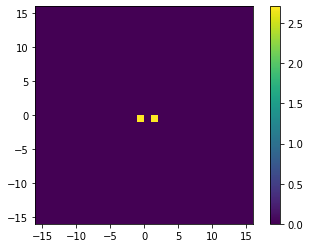

In [83]:
plt.imshow(np.log10(1+np.real(Zfft)), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

6) Décrire qualitativement les résultats obtenus.

7) Reproduire la question pour $Z_2$.

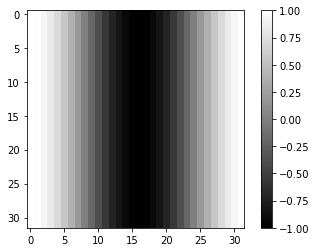

In [84]:
plt.imshow(Z, cmap='gray')
plt.colorbar()

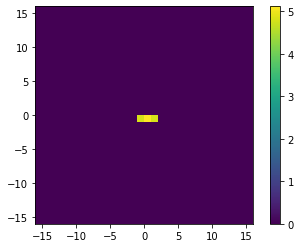

In [85]:
Zfft2 = np.fft.fftshift(np.fft.fft2(Z2))

plt.imshow(np.log10(1+np.real(Zfft2)), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

# Il y a une composantes en 0 --> Valeur moyenne

8) Créer une nouvelle matrice $Z_{3}$ vérifiant la même relation que $Z$ mais pour $f=8$. Reproduire les questions précédentes et interpréter.

In [86]:
f3 = 8
Z3 = np.cos((2*np.pi*f3/N)*X)

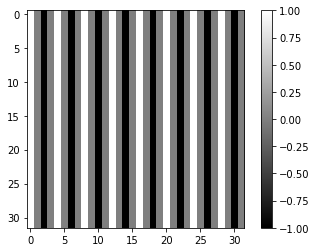

In [87]:
plt.imshow(Z3, cmap='gray')
plt.colorbar()

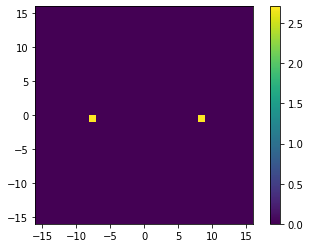

In [88]:
Zfft3 = np.fft.fftshift(np.fft.fft2(Z3))

plt.imshow(np.log10(1+np.real(Zfft3)), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

# Les fréquences sont bien 8 fois plus grandes

9) Générer une matrice carrée $Z_{4} \in \mathcal{M}_{N, N}(\mathbb{R})$ dont les composantes vérifient la relation
$$
Z_{4, n, m}=\cos \left(\frac{2 \pi}{N}\left(f_{x} X_{n, m}+f_{y} Y_{n, m}\right)\right)
$$
où $X_{n, m}=m$ et $Y_{n, m}=n$. On prendra $N=32, f_{x}=4$ et $f_{y}=8$. Reproduire les questions précédentes et interpréter.

In [89]:
Xn = np.arange(N)
Yn = np.arange(N)
X = np.empty((N, M))
Y = np.empty((N, M))

for j in range(M):
    X[j, :] = Xn

for i in range(N):
    Y[:, i] = Yn

In [90]:
fx = 4
fy = 8

Z4 = np.cos((2*np.pi*f/N)*(fx*X+fy*Y))


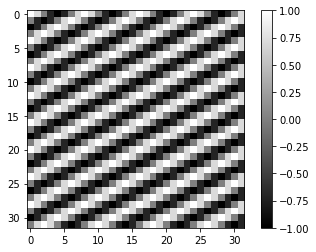

In [91]:
plt.imshow(Z4, cmap='gray')
plt.colorbar()


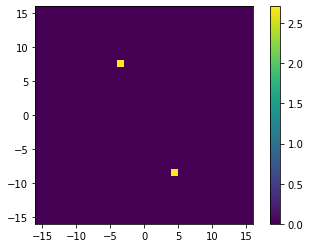

In [92]:
Zfft4 = np.fft.fftshift(np.fft.fft2(Z4))

plt.imshow(np.log10(1+np.real(Zfft4)), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

# On a bien les fréquence voulu 4 sur x et 8 sur y. Et son symétrique 

10) Créer la matrice $Z_{5}$ vérifiant
$$
Z_{5, n, m}=Z_{4, n, m} \exp \left(-R_{n, m}^{2}\right)
$$
où $R_{n, m}=\sqrt{\left(\frac{2 \pi}{N} X_{n, m}-\pi\right)^{2}+\left(\frac{2 \pi}{N} Y_{n, m}-\pi\right)^{2}}$. Répéter les questions précédentes pour cette nouvelle matrice.

In [93]:
π = np.pi
R = np.sqrt(((2*π/N)*X-π)**2 + ((2*π/N)*Y-π)**2 )
Z5 = Z4*np.exp(-R)

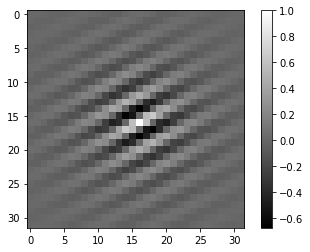

In [94]:
plt.imshow(Z5, cmap='gray')
plt.colorbar()
# Sorte de gausienne

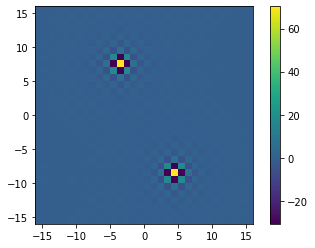

In [95]:
Zfft5 = np.fft.fftshift(np.fft.fft2(Z5))

plt.imshow(np.real(Zfft5), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

# Z5 = Z4×Gauss -> F[Z5] = F[Z4]*F[Gauss]

11) Répéter les mêmes questions pour $Z_{6}=\operatorname{sign}\left(Z_{1}\right)$ où on aura pris $f=2$ et $Z_{7}=\operatorname{sign}\left(Z_{4}\right)$ pour $f_{x}=2$ et $f_{y}=2$.

In [96]:
f1 = 2
Z1 = np.cos((2*np.pi*f1/N)*X)

fx_bis = 4
fy_bis = 8

Z4_bis = np.cos((2*np.pi*f1/N)*(fx_bis*X+fy_bis*Y))

Z6 = np.sign(Z1)

Z7 = np.sign(Z4_bis)


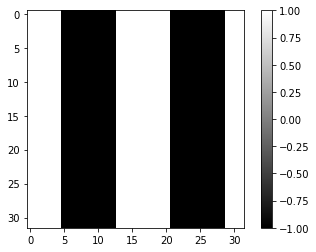

In [97]:
plt.imshow(Z6, cmap='gray')
plt.colorbar()

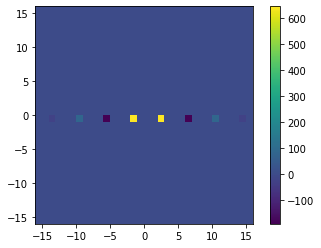

In [98]:
Zfft6 = np.fft.fftshift(np.fft.fft2(Z6))

plt.imshow(np.real(Zfft6), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

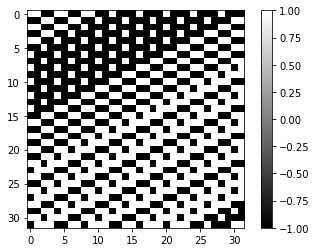

In [99]:
plt.imshow(Z7, cmap='gray')
plt.colorbar()


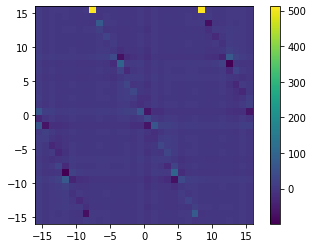

In [100]:
Zfft7 = np.fft.fftshift(np.fft.fft2(Z7))

plt.imshow(np.real(Zfft7), extent=[-N/2, N/2, -N/2, N/2])
plt.colorbar()

12) Ouvrir l'image `barbara.png` et la stocker dans la variable $i$. Nous souhaitons voir dans cette question l'effet d'une "troncature" en fréquence. Créer pour cela les cinq matrices carrées suivantes de taille $N \times N$
$$
\begin{aligned}
&R_{1, n, m}=\left(X_{n, m}-256\right)^{2}+\left(Y_{n, m}-256\right)^{2} \\
&R_{2, n, m}=\left(X_{n, m}-183\right)^{2}+\left(Y_{n, m}-318\right)^{2} \\
&R_{3, n, m}=\left(X_{n, m}-338\right)^{2}+\left(Y_{n, m}-192\right)^{2} \\
&R_{4, n, m}=\left(X_{n, m}-205\right)^{2}+\left(Y_{n, m}-211\right)^{2} \\
&R_{5, n, m}=\left(X_{n, m}-305\right)^{2}+\left(Y_{n, m}-311\right)^{2}
\end{aligned}
$$
À l'aide de la FFT inverse, créer l'image $Z_{8}$ vérifiant la relation
$$
Z_{8}=\operatorname{ifft}\left(\exp \left(-R_{1} / 200\right) \cdot \operatorname{fft}(i)\right)
$$
La notation - désigne ici la multiplication terme à terme. Afficher $Z_{8}$ et interpréter le résultat. Reproduire la question pour
$$
Z_{9}=\operatorname{ifft}\left(\left(\exp \left(-R_{1} / 200\right)+\sum_{k=2}^{5} \exp \left(-R_{k} / 50\right)\right) \cdot \operatorname{fft}(i)\right)
$$

In [114]:
from skimage import io
image = io.imread('./barbara.png', as_gray=True)

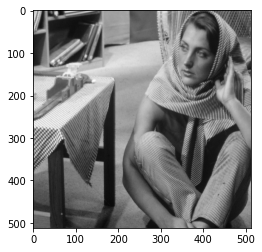

In [115]:
plt.imshow(image, cmap='gray')

In [116]:
N = 512
M = 512

Xn = np.arange(N)
Yn = np.arange(N)
X = np.empty((N, M))
Y = np.empty((N, M))
for j in range(M):
    X[j, :] = Xn
for i in range(N):
    Y[:, i] = Yn

tronc1 = (256, 256)
tronc2 = (183, 318)
tronc3 = (338, 192)
tronc4 = (205, 211)
tronc5 = (305, 311)

R1 = (X-tronc1[0])**2 + (Y-tronc1[1])**2
R2 = (X-tronc2[0])**2 + (Y-tronc2[1])**2
R3 = (X-tronc3[0])**2 + (Y-tronc3[1])**2
R4 = (X-tronc4[0])**2 + (Y-tronc4[1])**2
R5 = (X-tronc5[0])**2 + (Y-tronc5[1])**2

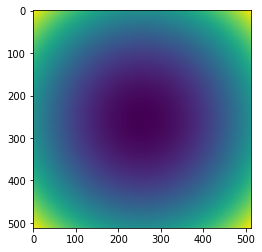

In [117]:
plt.imshow(R1)

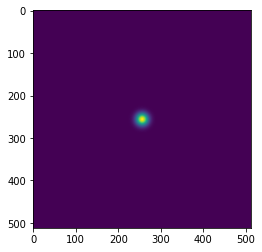

In [118]:
plt.imshow(np.exp(-R1/200))

In [123]:
Z8 = np.abs(np.fft.ifft2(np.exp(-R1/200)*np.fft.fft2(image)))

In [124]:
np.min(Z8)

3.972088035277075e-11

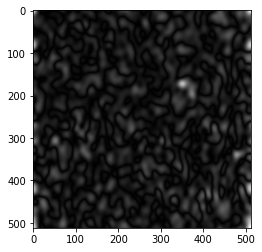

In [125]:
plt.imshow(Z8, cmap='gray')

## Exercice 2 - Rotation, interpolation par plus proche voisin.

Pour commencer, on va assimiler une image $v$ de taille $N \times N$ à une fonction $\tilde{v}$ constante par morceaux sur $\mathbb{R}^{2}$ telle que l'origine soit au centre de l'image. Ainsi, on a
$$
\forall x, y \in \mathbb{R}^{2} \tilde{v}(x, y)=v_{\operatorname{round}\left(x+\frac{N}{2}\right), \operatorname{round}\left(y+\frac{N}{2}\right)} .
$$
où round $(r)$ désigne l'entier le plus proche de $r$. La fonction mathématique ROUND est implémentée par la fonction NUMPY du même nom en Python. Soit $\theta \in \mathbb{R}$. Dans $\mathbb{R}^{2}$, on note $R_{\theta}$ la rotation d'angle $\theta$ et on pose $\tilde{w}=\tilde{v} \circ R_{\theta}$.

En gros on interprète notre image ($v$) comme un fonction de $\mathbb{R^2}$ ($\tilde{v}$). On créer des plateaux autour de chaque pixel (fonction affine par morceaux).

1) Rappeler quelle est la matrice de $R_{\theta}$ dans la base canonique. 

$$R_{\theta} = \left(\begin{array}{cc}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta
\end{array}\right)$$

# Matrice de rotation inversé car l'axe Y est vers le bas.

2) Soit $w$ l'échantillonnage de $\tilde{w}$ de taille $N \times N$ avec les mêmes conventions (centre de l'image à l'origine). Pour tout couple $(m, n)$, il existe un couple $\left(m^{\prime}, n^{\prime}\right)$ tel que $w_{m, n}=v_{m^{\prime}, n^{\prime}}$. Exprimer $m^{\prime}$ et $n^{\prime}$ en fonction de $m$ et $n$.

In [ ]:
ω = 

3) Définir une fonction `rotate(v, theta)` qui renvoie l'image $w$ obtenue après rotation d'angle $\theta$ avec les conventions précédentes. La tester à l'aide des images fournies.

In [ ]:
def rotate(v, θ):
    c, s = np.cos(θ), np.sin(θ)
    R = np.array(((c, s), (-s, c)))
